### Note
* This is data import for gdp_data and population_data

In [105]:
# Dependencies and Setup
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats 
from matplotlib.ticker import FormatStrFormatter
from scipy.stats import linregress
from sklearn import datasets
from scipy.stats import pearsonr

# Import population and gdp csv files
population = r"C:\Git\WorldBank_ETL\Resources\population_data.csv"
gdp = r"C:\Git\WorldBank_ETL\Resources\gdp_data.csv"
# Read gdp_data and population_data files and store into Pandas data frame
population_df = pd.read_csv(population)
gdp_df = pd.read_csv(gdp)




## Display Dataframes

In [2]:
population_df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,...,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.620000e+02,2.620000e+02,2.620000e+02,2.620000e+02,2.620000e+02,2.620000e+02
mean,1.178047e+08,1.193879e+08,1.215043e+08,1.241388e+08,1.267943e+08,1.295161e+08,1.323830e+08,1.352449e+08,1.381576e+08,1.412127e+08,...,2.700922e+08,2.736009e+08,2.771312e+08,2.806502e+08,2.853281e+08,2.890029e+08,2.927066e+08,2.964194e+08,3.001537e+08,3.038840e+08
std,3.718380e+08,3.763000e+08,3.828567e+08,3.914029e+08,3.999940e+08,4.088230e+08,4.182201e+08,4.275709e+08,4.371272e+08,4.471654e+08,...,8.590623e+08,8.695613e+08,8.801281e+08,8.907357e+08,9.030998e+08,9.140529e+08,9.250713e+08,9.361003e+08,9.471857e+08,9.582593e+08
min,4.279000e+03,4.453000e+03,4.566000e+03,4.656000e+03,4.748000e+03,4.841000e+03,4.936000e+03,5.033000e+03,5.161000e+03,5.303000e+03,...,9.947000e+03,9.945000e+03,1.002500e+04,1.005700e+04,1.027900e+04,1.081900e+04,1.090800e+04,1.100100e+04,1.109700e+04,1.119200e+04
25%,5.184015e+05,5.301480e+05,5.426568e+05,5.559520e+05,5.684168e+05,5.727790e+05,5.786500e+05,5.882328e+05,6.257960e+05,6.567582e+05,...,1.363216e+06,1.425982e+06,1.443678e+06,1.465471e+06,1.415726e+06,1.431560e+06,1.447306e+06,1.471523e+06,1.522803e+06,1.577113e+06
50%,3.669524e+06,3.734206e+06,3.839584e+06,3.955168e+06,4.074411e+06,4.170862e+06,4.235562e+06,4.300502e+06,4.367325e+06,4.449014e+06,...,9.219637e+06,9.298515e+06,9.378126e+06,9.460802e+06,9.624267e+06,9.746730e+06,9.879129e+06,1.002115e+07,1.012427e+07,1.018073e+07
75%,2.532754e+07,2.611541e+07,2.690508e+07,2.770050e+07,2.847884e+07,2.924750e+07,2.999693e+07,3.059503e+07,3.120239e+07,3.179527e+07,...,4.994594e+07,5.038575e+07,5.087028e+07,5.140827e+07,5.249529e+07,5.318760e+07,5.396340e+07,5.493841e+07,5.590466e+07,5.716180e+07
max,3.032160e+09,3.073369e+09,3.126510e+09,3.191786e+09,3.257460e+09,3.324545e+09,3.394784e+09,3.464689e+09,3.535355e+09,3.610179e+09,...,6.766297e+09,6.849569e+09,6.932870e+09,7.014984e+09,7.099558e+09,7.185138e+09,7.271323e+09,7.357559e+09,7.444157e+09,7.530360e+09


In [3]:
population_df.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0
5,Arab World,ARB,"Population, total",SP.POP.TOTL,92490932.0,95044497.0,97682294.0,100411076.0,103239902.0,106174988.0,...,339825483.0,348145094.0,356508908.0,364895878.0,373306993.0,381702086.0,390043028.0,398304960.0,406452690.0,414491886.0
6,United Arab Emirates,ARE,"Population, total",SP.POP.TOTL,92634.0,101078.0,112472.0,125566.0,138529.0,150362.0,...,6894278.0,7666393.0,8270684.0,8672475.0,8900453.0,9006263.0,9070867.0,9154302.0,9269612.0,9400145.0
7,Argentina,ARG,"Population, total",SP.POP.TOTL,20619075.0,20953077.0,21287682.0,21621840.0,21953929.0,22283390.0,...,40382389.0,40799407.0,41223889.0,41656879.0,42096739.0,42539925.0,42981515.0,43417765.0,43847430.0,44271041.0
8,Armenia,ARM,"Population, total",SP.POP.TOTL,1874120.0,1941491.0,2009526.0,2077575.0,2144998.0,2211316.0,...,2908220.0,2888584.0,2877311.0,2875581.0,2881922.0,2893509.0,2906220.0,2916950.0,2924816.0,2930450.0
9,American Samoa,ASM,"Population, total",SP.POP.TOTL,20013.0,20486.0,21117.0,21882.0,22698.0,23520.0,...,57030.0,56227.0,55637.0,55320.0,55230.0,55307.0,55437.0,55537.0,55599.0,55641.0


In [4]:
gdp_df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,1.240000e+02,1.240000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.360000e+02,1.370000e+02,1.410000e+02,1.450000e+02,1.450000e+02,...,2.490000e+02,2.490000e+02,2.490000e+02,2.500000e+02,2.470000e+02,2.480000e+02,2.470000e+02,2.460000e+02,2.410000e+02,2.340000e+02
mean,7.074121e+10,7.352259e+10,7.801655e+10,8.452492e+10,9.299526e+10,9.742800e+10,1.043055e+11,1.108074e+11,1.160376e+11,1.277621e+11,...,2.028965e+12,1.924557e+12,2.140276e+12,2.394450e+12,2.489432e+12,2.568772e+12,2.653541e+12,2.505533e+12,2.586350e+12,2.847698e+12
std,2.186629e+11,2.294491e+11,2.461078e+11,2.652890e+11,2.902428e+11,3.050386e+11,3.313321e+11,3.503271e+11,3.735817e+11,4.097716e+11,...,7.159464e+12,6.764026e+12,7.328021e+12,8.092282e+12,8.298978e+12,8.521828e+12,8.765280e+12,8.319552e+12,8.527211e+12,9.177370e+12
min,1.201203e+07,1.159202e+07,9.122751e+06,1.084010e+07,1.271247e+07,1.359393e+07,1.446908e+07,1.583518e+07,1.460000e+07,1.585000e+07,...,3.029022e+07,2.710108e+07,3.182352e+07,3.871183e+07,3.767173e+07,3.750912e+07,3.729059e+07,3.555604e+07,3.657261e+07,3.973132e+07
25%,4.930171e+08,4.891902e+08,4.791808e+08,5.119021e+08,5.425784e+08,5.199337e+08,5.499500e+08,4.515241e+08,4.851608e+08,5.512373e+08,...,6.109928e+09,5.832915e+09,6.959697e+09,7.674355e+09,8.681057e+09,8.994685e+09,1.019047e+10,8.757940e+09,9.412034e+09,1.150900e+10
50%,1.988240e+09,2.074604e+09,2.174966e+09,2.510127e+09,2.766609e+09,2.784309e+09,2.876396e+09,3.046339e+09,3.271416e+09,3.651615e+09,...,3.913689e+10,3.744067e+10,4.028448e+10,4.586291e+10,5.038845e+10,5.447389e+10,5.673199e+10,5.317434e+10,5.324089e+10,5.944777e+10
75%,1.484928e+10,1.585175e+10,1.659254e+10,1.895413e+10,2.113724e+10,2.219508e+10,2.432000e+10,2.656000e+10,2.914338e+10,3.164920e+10,...,5.100000e+11,4.290000e+11,4.840000e+11,5.297500e+11,5.550000e+11,5.587500e+11,5.710000e+11,5.787500e+11,6.450000e+11,7.177500e+11
max,1.350000e+12,1.410000e+12,1.510000e+12,1.630000e+12,1.790000e+12,1.950000e+12,2.110000e+12,2.250000e+12,2.430000e+12,2.670000e+12,...,6.340000e+13,6.010000e+13,6.600000e+13,7.330000e+13,7.500000e+13,7.710000e+13,7.910000e+13,7.480000e+13,7.590000e+13,8.070000e+13


In [5]:
#Display gdp_df dataframe
gdp_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,537777811.1,548888895.6,546666677.8,751111191.1,800000044.4,1.006667e+09,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.417804e+10,7.549239e+10,8.252614e+10,1.040000e+11,1.140000e+11,1.250000e+11,1.270000e+11,1.030000e+11,9.533720e+10,1.240000e+11
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09


In [6]:
#Display gdp_df data frame
gdp_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,537777811.1,548888895.6,546666677.8,751111191.1,800000044.4,1.006667e+09,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.417804e+10,7.549239e+10,8.252614e+10,1.040000e+11,1.140000e+11,1.250000e+11,1.270000e+11,1.030000e+11,9.533720e+10,1.240000e+11
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09


## Display Dataframes

In [7]:
#Melt gdp_df year columns under a Year column

In [8]:
gdp_combined_df = gdp_df.melt(id_vars = ["Country Name", "Country Code", "Indicator Name", "Indicator Code"], value_vars = ["1960", "1961",\
"1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978",\
"1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995",\
"1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012",\
"2013","2014","2015","2016","2017"], var_name = "Year", value_name = "GDP")

In [9]:
gdp_combined_df

,Country Name,Country Code,Indicator Name,Indicator Code,Year,GDP
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,1960,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1960,5.377778e+08
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,1960,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,1960,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,1960,NaN
...,...,...,...,...,...,...
15307,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,2017,7.128691e+09
15308,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,2017,NaN
15309,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,2017,3.490000e+11
15310,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,2017,2.580867e+10


In [10]:
#Melt population_df so year columns are under Year column

In [11]:
population_combined_df = population_df.melt(id_vars = ["Country Name", "Country Code", "Indicator Name", "Indicator Code"], value_vars = ["1960", "1961",\
"1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978",\
"1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995",\
"1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012",\
"2013","2014","2015","2016","2017"], var_name = "Year", value_name = "Population")

In [12]:
#Display population_combined_df dataframe
population_combined_df


,Country Name,Country Code,Indicator Name,Indicator Code,Year,Population
0,Aruba,ABW,"Population, total",SP.POP.TOTL,1960,54211.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1960,8996351.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,1960,5643182.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1960,1608800.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,1960,13411.0
...,...,...,...,...,...,...
15307,Kosovo,XKX,"Population, total",SP.POP.TOTL,2017,1830700.0
15308,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,2017,28250420.0
15309,South Africa,ZAF,"Population, total",SP.POP.TOTL,2017,56717156.0
15310,Zambia,ZMB,"Population, total",SP.POP.TOTL,2017,17094130.0


In [13]:
#Find Not Clasified country name in population_combined_df datframe
result = population_combined_df.loc(["Country Name"] == "Not classified")
print(result)

In [14]:
# Set the index of the DataFrame to the country name
population_combined_country_index = population_combined_df.set_index("Country Name")
population_combined_country_index.head()


,Country Code,Indicator Name,Indicator Code,Year,Population
Country Name,,,,,
Aruba,ABW,"Population, total",SP.POP.TOTL,1960,54211.0
Afghanistan,AFG,"Population, total",SP.POP.TOTL,1960,8996351.0
Angola,AGO,"Population, total",SP.POP.TOTL,1960,5643182.0
Albania,ALB,"Population, total",SP.POP.TOTL,1960,1608800.0
Andorra,AND,"Population, total",SP.POP.TOTL,1960,13411.0


In [15]:
# Find out number of rows inside population_combined_df dataframe
len(population_combined_country_index.index)

15312

In [16]:
# With the index, we can drop the rows for a single country with its name
population_combined_country_indx = population_combined_country_index.drop("Not classified")

In [17]:
# Find out number of rows after dropping Not Clasified country name inside dataframe
len(population_combined_country_indx.index)

15254

In [18]:
#Reset index inside population_combined_country_index and rename it into pop_data_df
pop_data_df = population_combined_country_indx.reset_index()


In [19]:
# Display pop_data_df dataframe
pop_data_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Population
0,Aruba,ABW,"Population, total",SP.POP.TOTL,1960,54211.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1960,8996351.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,1960,5643182.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1960,1608800.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,1960,13411.0


In [20]:
# Change data type for year from object to integer in order to be able to clean data
pop_data_df["Year"] = pop_data_df['Year'].astype(str).astype(int)
print(pop_data_df.dtypes)

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
Year                int32
Population        float64
dtype: object


In [21]:
# Remove rows using the loc() function from pop_data_df and rename it into pop_data_clean,keep years 2000 and above

pop_data_clean = pop_data_df.loc[(pop_data_df["Year"] >= 1990)].reset_index(drop = True)

# display the dataframe
pop_data_clean



,Country Name,Country Code,Indicator Name,Indicator Code,Year,Population
0,Aruba,ABW,"Population, total",SP.POP.TOTL,1990,62149.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1990,12249114.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,1990,12171441.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1990,3286542.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,1990,54509.0
...,...,...,...,...,...,...
7359,Kosovo,XKX,"Population, total",SP.POP.TOTL,2017,1830700.0
7360,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,2017,28250420.0
7361,South Africa,ZAF,"Population, total",SP.POP.TOTL,2017,56717156.0
7362,Zambia,ZMB,"Population, total",SP.POP.TOTL,2017,17094130.0


In [22]:
pop_data_clean2 = pop_data_clean

In [23]:
#  Show number of rows for pop_data_clean
len(pop_data_clean2)

7364

In [24]:
# Display pop_data_clean2 dataframe head
pop_data_clean2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Population
0,Aruba,ABW,"Population, total",SP.POP.TOTL,1990,62149.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1990,12249114.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,1990,12171441.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1990,3286542.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,1990,54509.0


In [25]:
#Set the index of the gdp_combined_df DataFrame to the country name
gdp_combined_df= gdp_combined_df.set_index("Country Name")
gdp_combined_df.head() 

,Country Code,Indicator Name,Indicator Code,Year,GDP
Country Name,,,,,
Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,1960,NaN
Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1960,537777811.1
Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,1960,NaN
Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,1960,NaN
Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,1960,NaN


In [26]:
# Find number of rows before dropping Not Clasified country name
len(gdp_combined_df.index)

15312

In [27]:
# With the index, we can drop the rows for a single country with its name Not clasifed inside gdp_combined_df dataframe
gdp_combined_df = gdp_combined_df.drop("Not classified")


In [28]:
# Find number of rows inside gdp_combined_df dataframe after dropping Not Clasified country name
len(gdp_combined_df)

15254

In [29]:
# Reset index on gdp_combined_df dataframe
gdp_combined_df.reset_index()


,Country Name,Country Code,Indicator Name,Indicator Code,Year,GDP
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,1960,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1960,5.377778e+08
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,1960,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,1960,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,1960,NaN
...,...,...,...,...,...,...
15249,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,2017,7.128691e+09
15250,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,2017,NaN
15251,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,2017,3.490000e+11
15252,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,2017,2.580867e+10


In [30]:
# Change Year type from object into integer in the gdp_combined_df dataframe
gdp_combined_df["Year"] = gdp_combined_df['Year'].astype(str).astype(int)
print(gdp_combined_df.dtypes)


Country Code       object
Indicator Name     object
Indicator Code     object
Year                int32
GDP               float64
dtype: object


In [31]:
# Remove rows using the loc() function from gdp_combined_df data frame for years under 2000 and
# rename dataframe to gdp_data_clean
gdp_data_clean = gdp_combined_df.loc[(gdp_combined_df["Year"] >= 1990)].reset_index()

# display the dataframe
gdp_data_clean.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,GDP
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,1990,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1990,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,1990,1.123628e+10
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,1990,2.101625e+09
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,1990,1.029048e+09


In [32]:
# Find length inside gdp_data_clean data frame
len(gdp_data_clean)

7364

In [33]:
gdp_data_clean2 = gdp_data_clean
gdp_data_clean2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,GDP
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,1990,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1990,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,1990,1.123628e+10
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,1990,2.101625e+09
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,1990,1.029048e+09


In [34]:
# Write pop_data_clean dataframe into csv file
pop_data_clean.to_csv(r'C:\Git\WorldBank_ETL\Resources\population_data_clean2.csv', encoding='utf-8')

        

In [35]:
# Write gdp_data_clean dataframe into csv file
gdp_data_clean.to_csv(r'C:\Git\WorldBank_ETL\Resources\gdp_data_clean2.csv', encoding='utf-8')

In [36]:
# Drop NaN rows indide pop_data_clean dataframe
pop_data_clean2.dropna()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Population
0,Aruba,ABW,"Population, total",SP.POP.TOTL,1990,62149.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1990,12249114.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,1990,12171441.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1990,3286542.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,1990,54509.0
...,...,...,...,...,...,...
7359,Kosovo,XKX,"Population, total",SP.POP.TOTL,2017,1830700.0
7360,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,2017,28250420.0
7361,South Africa,ZAF,"Population, total",SP.POP.TOTL,2017,56717156.0
7362,Zambia,ZMB,"Population, total",SP.POP.TOTL,2017,17094130.0


In [37]:
# Find number of rows after dropping NaN values
len(pop_data_clean2)

7364

In [38]:
# Drop NaN rows indide pop_data_clean dataframe
gdp_data_final = gdp_data_clean2.dropna().reset_index(drop = True)
gdp_data_final

,Country Name,Country Code,Indicator Name,Indicator Code,Year,GDP
0,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,1990,1.123628e+10
1,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,1990,2.101625e+09
2,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,1990,1.029048e+09
3,Arab World,ARB,GDP (current US$),NY.GDP.MKTP.CD,1990,4.470000e+11
4,United Arab Emirates,ARE,GDP (current US$),NY.GDP.MKTP.CD,1990,5.070144e+10
...,...,...,...,...,...,...
6731,Samoa,WSM,GDP (current US$),NY.GDP.MKTP.CD,2017,8.566265e+08
6732,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,2017,7.128691e+09
6733,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,2017,3.490000e+11
6734,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,2017,2.580867e+10


In [39]:
# Find number of rows inside gdp_data_final after dropping NaN values
len(gdp_data_final)


6736

In [40]:
print(gdp_data_final.dtypes)

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
Year                int32
GDP               float64
dtype: object


In [41]:
#Calculate Min, Max, and Percentage from gdp_data_final 

GDP_Min = pd.DataFrame(gdp_data_final.groupby("Country Name")['GDP'].min())

GDP_Max = pd.DataFrame(gdp_data_final.groupby("Country Name")['GDP'].max())

GDP_Pct_Ch = pd.DataFrame(((GDP_Max - GDP_Min) / GDP_Min)*100).round(3)

country_df = pd.DataFrame(gdp_data_final["Country Name"].drop_duplicates())







In [42]:
GDP_Min2 = GDP_Min.rename(columns={'GDP':'GDP Min'}).reset_index()
GDP_Max2 = GDP_Max.rename(columns={'GDP':'GDP Max'}).reset_index()
GDP_Pct_Ch2 = GDP_Pct_Ch.rename(columns={'GDP':'GDP Pct Ch'}).reset_index()

In [43]:
country_gdp_delta = pd.merge(country_df, GDP_Min2, how = "inner", on = "Country Name")
country_gdp_delta = pd.merge(country_gdp_delta, GDP_Max2, how = "inner", on = "Country Name")
country_gdp_delta2 = pd.merge(country_gdp_delta, GDP_Pct_Ch2, how = "inner", on = "Country Name")

In [44]:
country_gdp_delta2.head(10)

,Country Name,GDP Min,GDP Max,GDP Pct Ch
0,Angola,3.390500e+09,1.270000e+11,3645.760
1,Albania,7.094526e+08,1.322824e+10,1764.571
2,Andorra,1.007026e+09,4.016972e+09,298.895
3,Arab World,4.400000e+11,2.910000e+12,561.364
4,United Arab Emirates,5.070144e+10,4.030000e+11,694.849
5,Argentina,9.772400e+10,6.380000e+11,552.859
6,Armenia,1.201313e+09,1.166204e+10,870.775
7,Antigua and Barbuda,4.594691e+08,1.532398e+09,233.515
8,Australia,3.110000e+11,1.570000e+12,404.823
9,Austria,1.660000e+11,4.420000e+11,166.265


In [45]:
country_gdp_ordered= country_gdp_delta2.sort_values("GDP Pct Ch",ascending=False)
country_gdp_ordered.head(10)

,Country Name,GDP Min,GDP Max,GDP Pct Ch
74,Equatorial Guinea,1.008070e+08,2.238963e+10,22110.389
0,Angola,3.390500e+09,1.270000e+11,3645.760
144,Nigeria,1.578900e+10,5.680000e+11,3497.440
212,Vietnam,6.471741e+09,2.240000e+11,3361.202
33,China,3.610000e+11,1.220000e+13,3279.501
166,Qatar,6.883516e+09,2.060000e+11,2892.656
193,Turkmenistan,1.600000e+09,4.352421e+10,2620.263
10,Azerbaijan,3.052647e+09,7.524429e+10,2364.887
188,East Asia & Pacific (IDA & IBRD countries),6.620000e+11,1.470000e+13,2120.544
52,East Asia & Pacific (excluding high income),6.630000e+11,1.470000e+13,2117.195


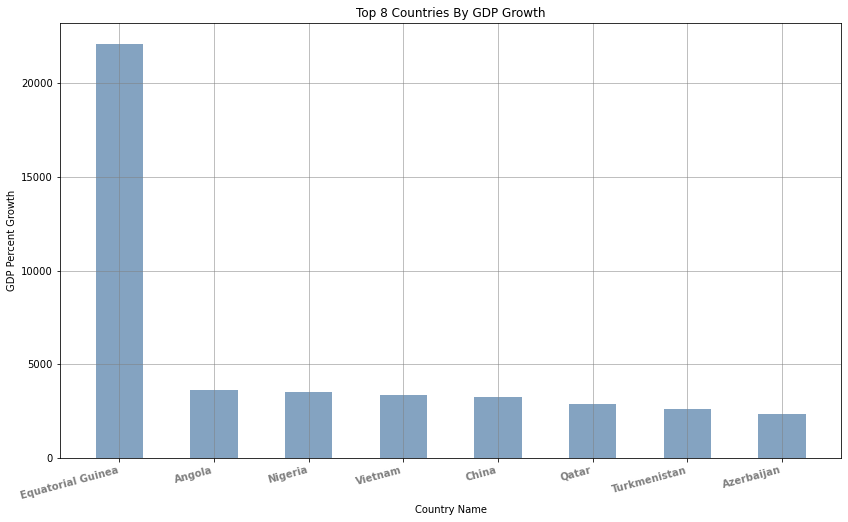

In [46]:
#Create bar graph of top 8 Countries by GDP growth
height = country_gdp_ordered["GDP Pct Ch"].astype(int).iloc[0:8].to_list()
bars = country_gdp_ordered["Country Name"].tolist()[0:8]
y_pos = np.arange(len(bars))
plt.rcParams["figure.figsize"] = (14,8)
width = 0.5  # the width of the bars
# Basic plot
plt.bar(y_pos, height, width,label = "GDP % Ch.", color=(0.2, 0.4, 0.6, 0.6))
 
# use the plt.xticks function to custom labels
plt.xticks(y_pos, bars, color='grey', rotation=15, fontweight='bold', fontsize='10', horizontalalignment='right')
plt.ylabel("GDP Percent Growth")
plt.xlabel("Country Name")
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title("Top 8 Countries By GDP Growth")
plt.savefig(r"C:\Git\WorldBank_ETL\Images_gdp_pop\top_10_gdp_growth.png")
plt.show()


In [47]:
country_gdp_desc= country_gdp_delta2.sort_values("GDP Pct Ch",ascending=True)
country_gdp_desc.head(10)

,Country Name,GDP Min,GDP Max,GDP Pct Ch
255,Somalia,6.486975e+09,7.368561e+09,13.590
165,French Polynesia,3.181206e+09,3.982375e+09,25.184
250,American Samoa,4.960000e+08,6.780000e+08,36.694
142,New Caledonia,2.529310e+09,3.628440e+09,43.456
251,Guam,3.385000e+09,5.793000e+09,71.137
252,Northern Mariana Islands,7.330000e+08,1.284000e+09,75.171
239,Channel Islands,5.945677e+09,1.151461e+10,93.663
98,Japan,3.130000e+12,6.200000e+12,98.083
245,Palau,1.447699e+08,3.026998e+08,109.090
226,Aruba,1.320670e+09,2.791961e+09,111.405


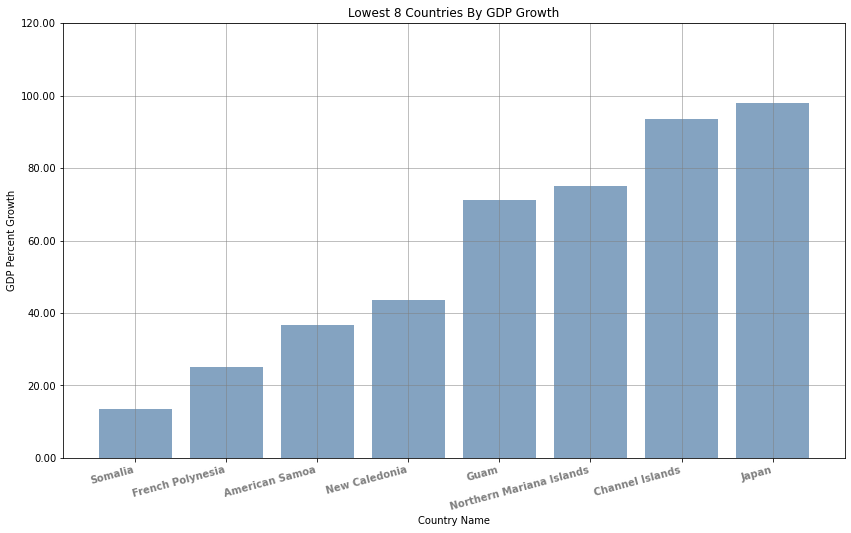

In [48]:
#Create bar graph of lowest 8 Countries by GDP growth
height = country_gdp_desc["GDP Pct Ch"].astype(float).iloc[0:8].to_list()
bars = country_gdp_desc["Country Name"].iloc[0:8]
y_pos = np.arange(len(bars))
plt.rcParams["figure.figsize"] = (14,8)
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
# Basic plot
plt.bar(y_pos, height, color=(0.2, 0.4, 0.6, 0.6))

# use the plt.xticks function to custom labels
plt.ylim(0,120)
plt.xticks(y_pos, bars, color='grey', rotation=15, fontweight='bold', fontsize='10', horizontalalignment='right')
plt.ylabel("GDP Percent Growth")
plt.xlabel("Country Name")
plt.title("Lowest 8 Countries By GDP Growth")
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.savefig(r"C:\Git\WorldBank_ETL\Images_gdp_pop\bottom_10_gdp_growth.png")
plt.show()


In [49]:
#Calculate Min, Max, and Percentage from pop_data_clean2 

Pop_Min = pd.DataFrame(pop_data_clean2.groupby("Country Name")['Population'].min())

Pop_Max = pd.DataFrame(pop_data_clean2.groupby("Country Name")['Population'].max())

Pop_Pct_Ch = pd.DataFrame(((Pop_Max - Pop_Min) / Pop_Min)*100).round(3)

country_pop_df = pd.DataFrame(pop_data_clean2["Country Name"].drop_duplicates())



In [50]:
Pop_Min2 = Pop_Min.rename(columns={'Population':'Pop Min'}).reset_index()
Pop_Max2 = Pop_Min.rename(columns={'Population':'Pop Max'}).reset_index()
Pop_Pct_Ch2 = Pop_Pct_Ch.rename(columns={'Population':'Pop Pct Ch'}).reset_index()

In [51]:
country_pop_delta = pd.merge(country_pop_df, Pop_Min2, how = "inner", on = "Country Name")
country_pop_delta = pd.merge(country_pop_delta, Pop_Max2, how = "inner", on = "Country Name")
country_pop_delta2 = pd.merge(country_pop_delta, Pop_Pct_Ch2, how = "inner", on = "Country Name")

In [52]:
country_pop_delta2

,Country Name,Pop Min,Pop Max,Pop Pct Ch
0,Aruba,62149.0,62149.0,69.374
1,Afghanistan,12249114.0,12249114.0,190.062
2,Angola,12171441.0,12171441.0,144.706
3,Albania,2873457.0,2873457.0,14.376
4,Andorra,54509.0,54509.0,54.951
...,...,...,...,...
258,Kosovo,1700000.0,1700000.0,22.706
259,"Yemen, Rep.",12057039.0,12057039.0,134.306
260,South Africa,37560525.0,37560525.0,51.002
261,Zambia,8027253.0,8027253.0,112.951


In [53]:
# Find top 10 countries with highest populatiion increase
country_pop_desc= country_pop_delta2.sort_values("Pop Pct Ch",ascending=False)
country_pop_desc.head(10)

,Country Name,Pop Min,Pop Max,Pop Pct Ch
197,Qatar,476445.0,476445.0,453.938
6,United Arab Emirates,1860174.0,1860174.0,405.337
225,Turks and Caicos Islands,11552.0,11552.0,206.839
20,Bahrain,495931.0,495931.0,200.966
86,Equatorial Guinea,426846.0,426846.0,196.990
1,Afghanistan,12249114.0,12249114.0,190.062
115,Jordan,3560582.0,3560582.0,172.493
170,Niger,8012861.0,8012861.0,168.036
124,Kuwait,1610651.0,1610651.0,156.823
179,Oman,1812160.0,1812160.0,155.842


In [54]:
# Find 10 countries with lowest populatiion increase
country_pop_asc= country_pop_delta2.sort_values("Pop Pct Ch",ascending=True)
country_pop_asc.head(10)

,Country Name,Pop Min,Pop Max,Pop Pct Ch
187,Poland,37970087.0,37970087.0,1.826
250,St. Vincent and the Grenadines,107505.0,107505.0,2.225
218,Slovak Republic,5299187.0,5299187.0,2.655
159,Montenegro,604950.0,604950.0,2.896
89,Greenland,55200.0,55200.0,3.143
116,Japan,123537000.0,123537000.0,3.669
52,Czech Republic,10193998.0,10193998.0,3.898
53,Germany,79433029.0,79433029.0,4.107
199,Russian Federation,142742350.0,142742350.0,4.166
219,Slovenia,1981629.0,1981629.0,4.295


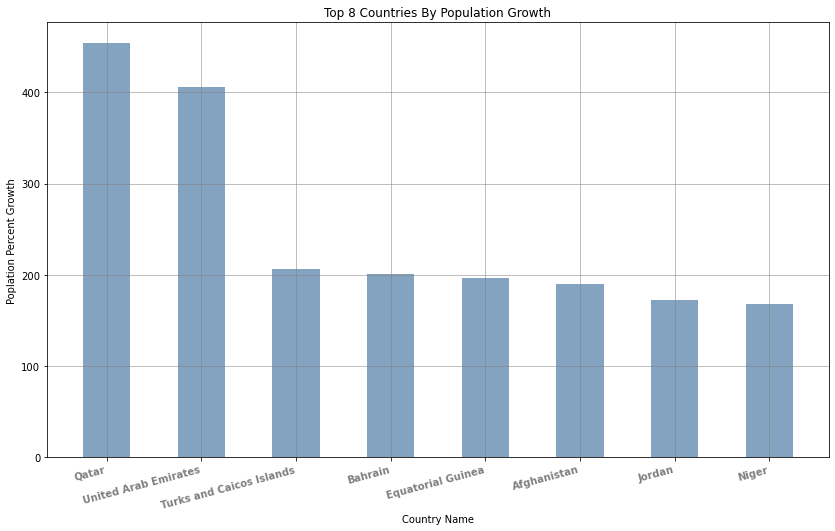

In [55]:
#Create bar graph of top 8 Countries by population growth
height = country_pop_desc["Pop Pct Ch"].astype(float).iloc[0:8].to_list()
bars = country_pop_desc["Country Name"].tolist()[0:8]
y_pos = np.arange(len(bars))
plt.rcParams["figure.figsize"] = (14,8)
width = 0.5  # the width of the bars
# Basic plot
plt.bar(y_pos, height, width,label = "Pop % Ch.", color=(0.2, 0.4, 0.6, 0.6))
 
# use the plt.xticks function to custom labels
plt.xticks(y_pos, bars, color='grey', rotation=15, fontweight='bold', fontsize='10', horizontalalignment='right')
plt.ylabel("Poplation Percent Growth")
plt.xlabel("Country Name")
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title("Top 8 Countries By Population Growth")
plt.savefig(r"C:\Git\WorldBank_ETL\Images_gdp_pop\top_8_pop_growth.png")
plt.show()


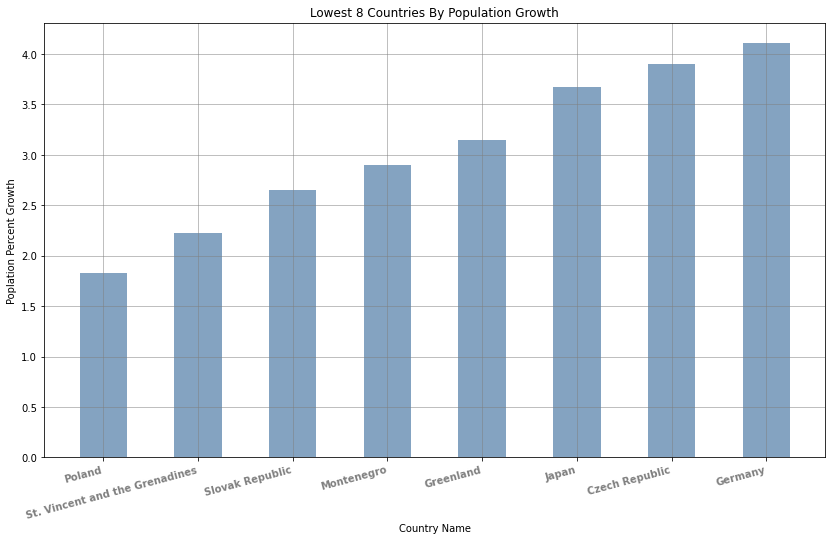

In [56]:
#Create bar graph of lowest 8 Countries by population growth
height = country_pop_asc["Pop Pct Ch"].astype(float).iloc[0:8].to_list()
bars = country_pop_asc["Country Name"].tolist()[0:8]
y_pos = np.arange(len(bars))
plt.rcParams["figure.figsize"] = (14,8)
width = 0.5  # the width of the bars
# Basic plot
plt.bar(y_pos, height, width,label = "Pop % Ch.", color=(0.2, 0.4, 0.6, 0.6))
 
# use the plt.xticks function to custom labels
plt.xticks(y_pos, bars, color='grey', rotation=15, fontweight='bold', fontsize='10', horizontalalignment='right')
plt.ylabel("Poplation Percent Growth")
plt.xlabel("Country Name")
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title("Lowest 8 Countries By Population Growth")
plt.savefig(r"C:\Git\WorldBank_ETL\Images_gdp_pop\low_8_pop_growth.png")
plt.show()

In [76]:
country_df1 = pd.DataFrame(country_gdp_delta2[["Country Name", "GDP Pct Ch"]])
country_df1["GDP Pct Ch"] = country_df1["GDP Pct Ch"].astype(int)
country_df1

,Country Name,GDP Pct Ch
0,Angola,3645
1,Albania,1764
2,Andorra,298
3,Arab World,561
4,United Arab Emirates,694
...,...,...
251,Guam,71
252,Northern Mariana Islands,75
253,Nauru,472
254,South Sudan,494


In [78]:
country_df2 = pd.DataFrame(country_pop_delta2[["Country Name", "Pop Pct Ch"]])
country_df2["Pop Pct Ch"] = country_df2["Pop Pct Ch"].astype(int)
country_df2.head(10)

,Country Name,Pop Pct Ch
0,Aruba,69
1,Afghanistan,190
2,Angola,144
3,Albania,14
4,Andorra,54
5,Arab World,84
6,United Arab Emirates,405
7,Argentina,35
8,Armenia,23
9,American Samoa,25


In [85]:
country_pop_gdp = pd.merge(country_df1, country_df2, how = "inner", on = "Country Name")
country_pop_gdp2 = country_pop_gdp.drop[]

print(country_pop_gdp.dtypes)
country_pop_gdp.head(10)

Country Name    object
GDP Pct Ch       int32
Pop Pct Ch       int32
dtype: object


,Country Name,GDP Pct Ch,Pop Pct Ch
0,Angola,3645,144
1,Albania,1764,14
2,Andorra,298,54
3,Arab World,561,84
4,United Arab Emirates,694,405
5,Argentina,552,35
6,Armenia,870,23
7,Antigua and Barbuda,233,52
8,Australia,404,44
9,Austria,166,14


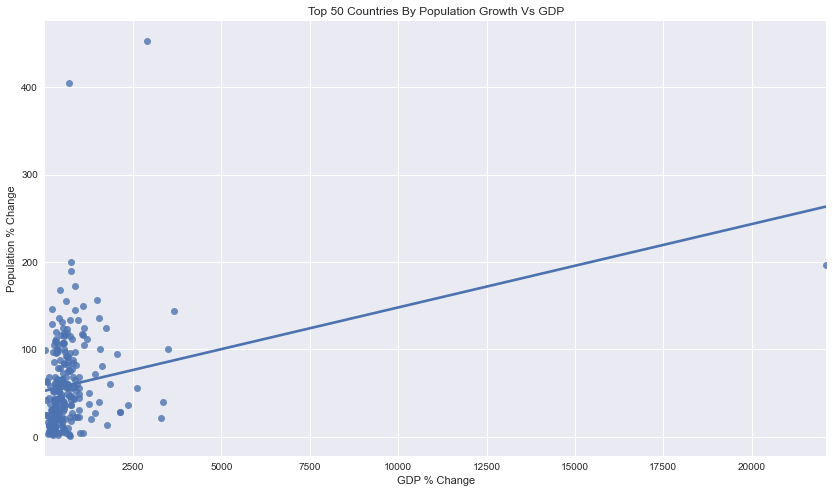

In [110]:
#Plot Linear regression betweeen Percentage in Population Growth and GDP Growth for Top 50 Countries with Highest
#Population change

plt.rcParams["figure.figsize"] = (14,8)
#Calculate Correlation Values
corr = pearsonr(country_pop_gdp['GDP Pct Ch'], country_pop_gdp['Pop Pct Ch'])
corr = [np.round(c, 2) for c in corr]
# Extracting the r-value and the p-value:
text = 'r=%s, p=%s' % (corr[0], corr[1])
sns.regplot(x='GDP Pct Ch', y='Pop Pct Ch', ci=None, data=country_pop_gdp)

# Adding the text to the Seaborn plot:
ax.text(4, 30, text, fontsize=10)
ax.set(xticks=np.arange(100, 30000, 100),yticks=np.arange(10, 500, 10))
plt.title("Top 50 Countries By Population Growth Vs GDP")
plt.xlabel('GDP % Change')
plt.ylabel('Population % Change')
plt.savefig(r"C:\Git\WorldBank_ETL\Images_gdp_pop\scatter_plot_GDP_Pop.png")
plt.style.use("seaborn")
plt.show()

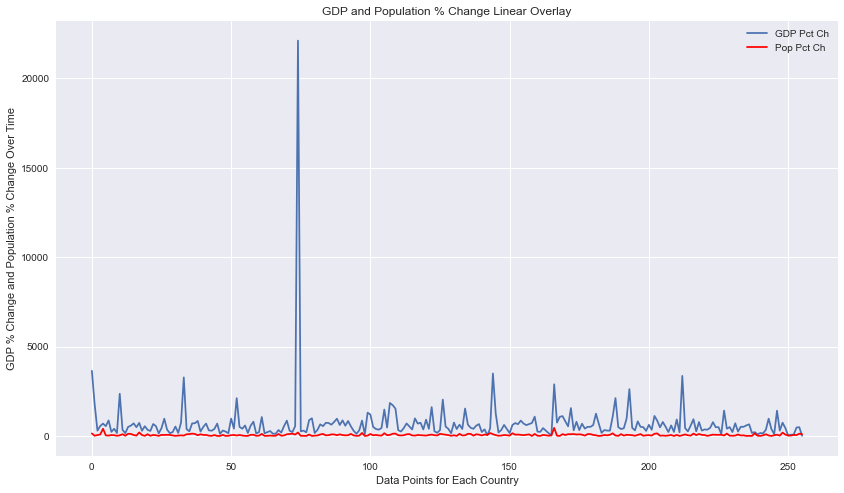

In [115]:
# This is a line plot to overlay percentage change in GDP and Population
# gca stands for 'get current axis'
plt.rcParams["figure.figsize"] = (14,8)
ax = plt.gca()
country_pop_gdp.plot(kind='line',y='GDP Pct Ch',use_index = True, ax=ax)
country_pop_gdp.plot(kind='line',y ='Pop Pct Ch',use_index = True, color='red', ax=ax)
plt.title("GDP and Population % Change Linear Overlay")
plt.xlabel("Data Points for Each Country")
plt.ylabel("GDP % Change and Population % Change Over Time")
plt.savefig(r"C:\Git\WorldBank_ETL\Images_gdp_pop\line_graph_GDP_Pop.png")
plt.show()